In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["figure.dpi"] = 300

In [2]:
df = pd.read_csv("data/fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


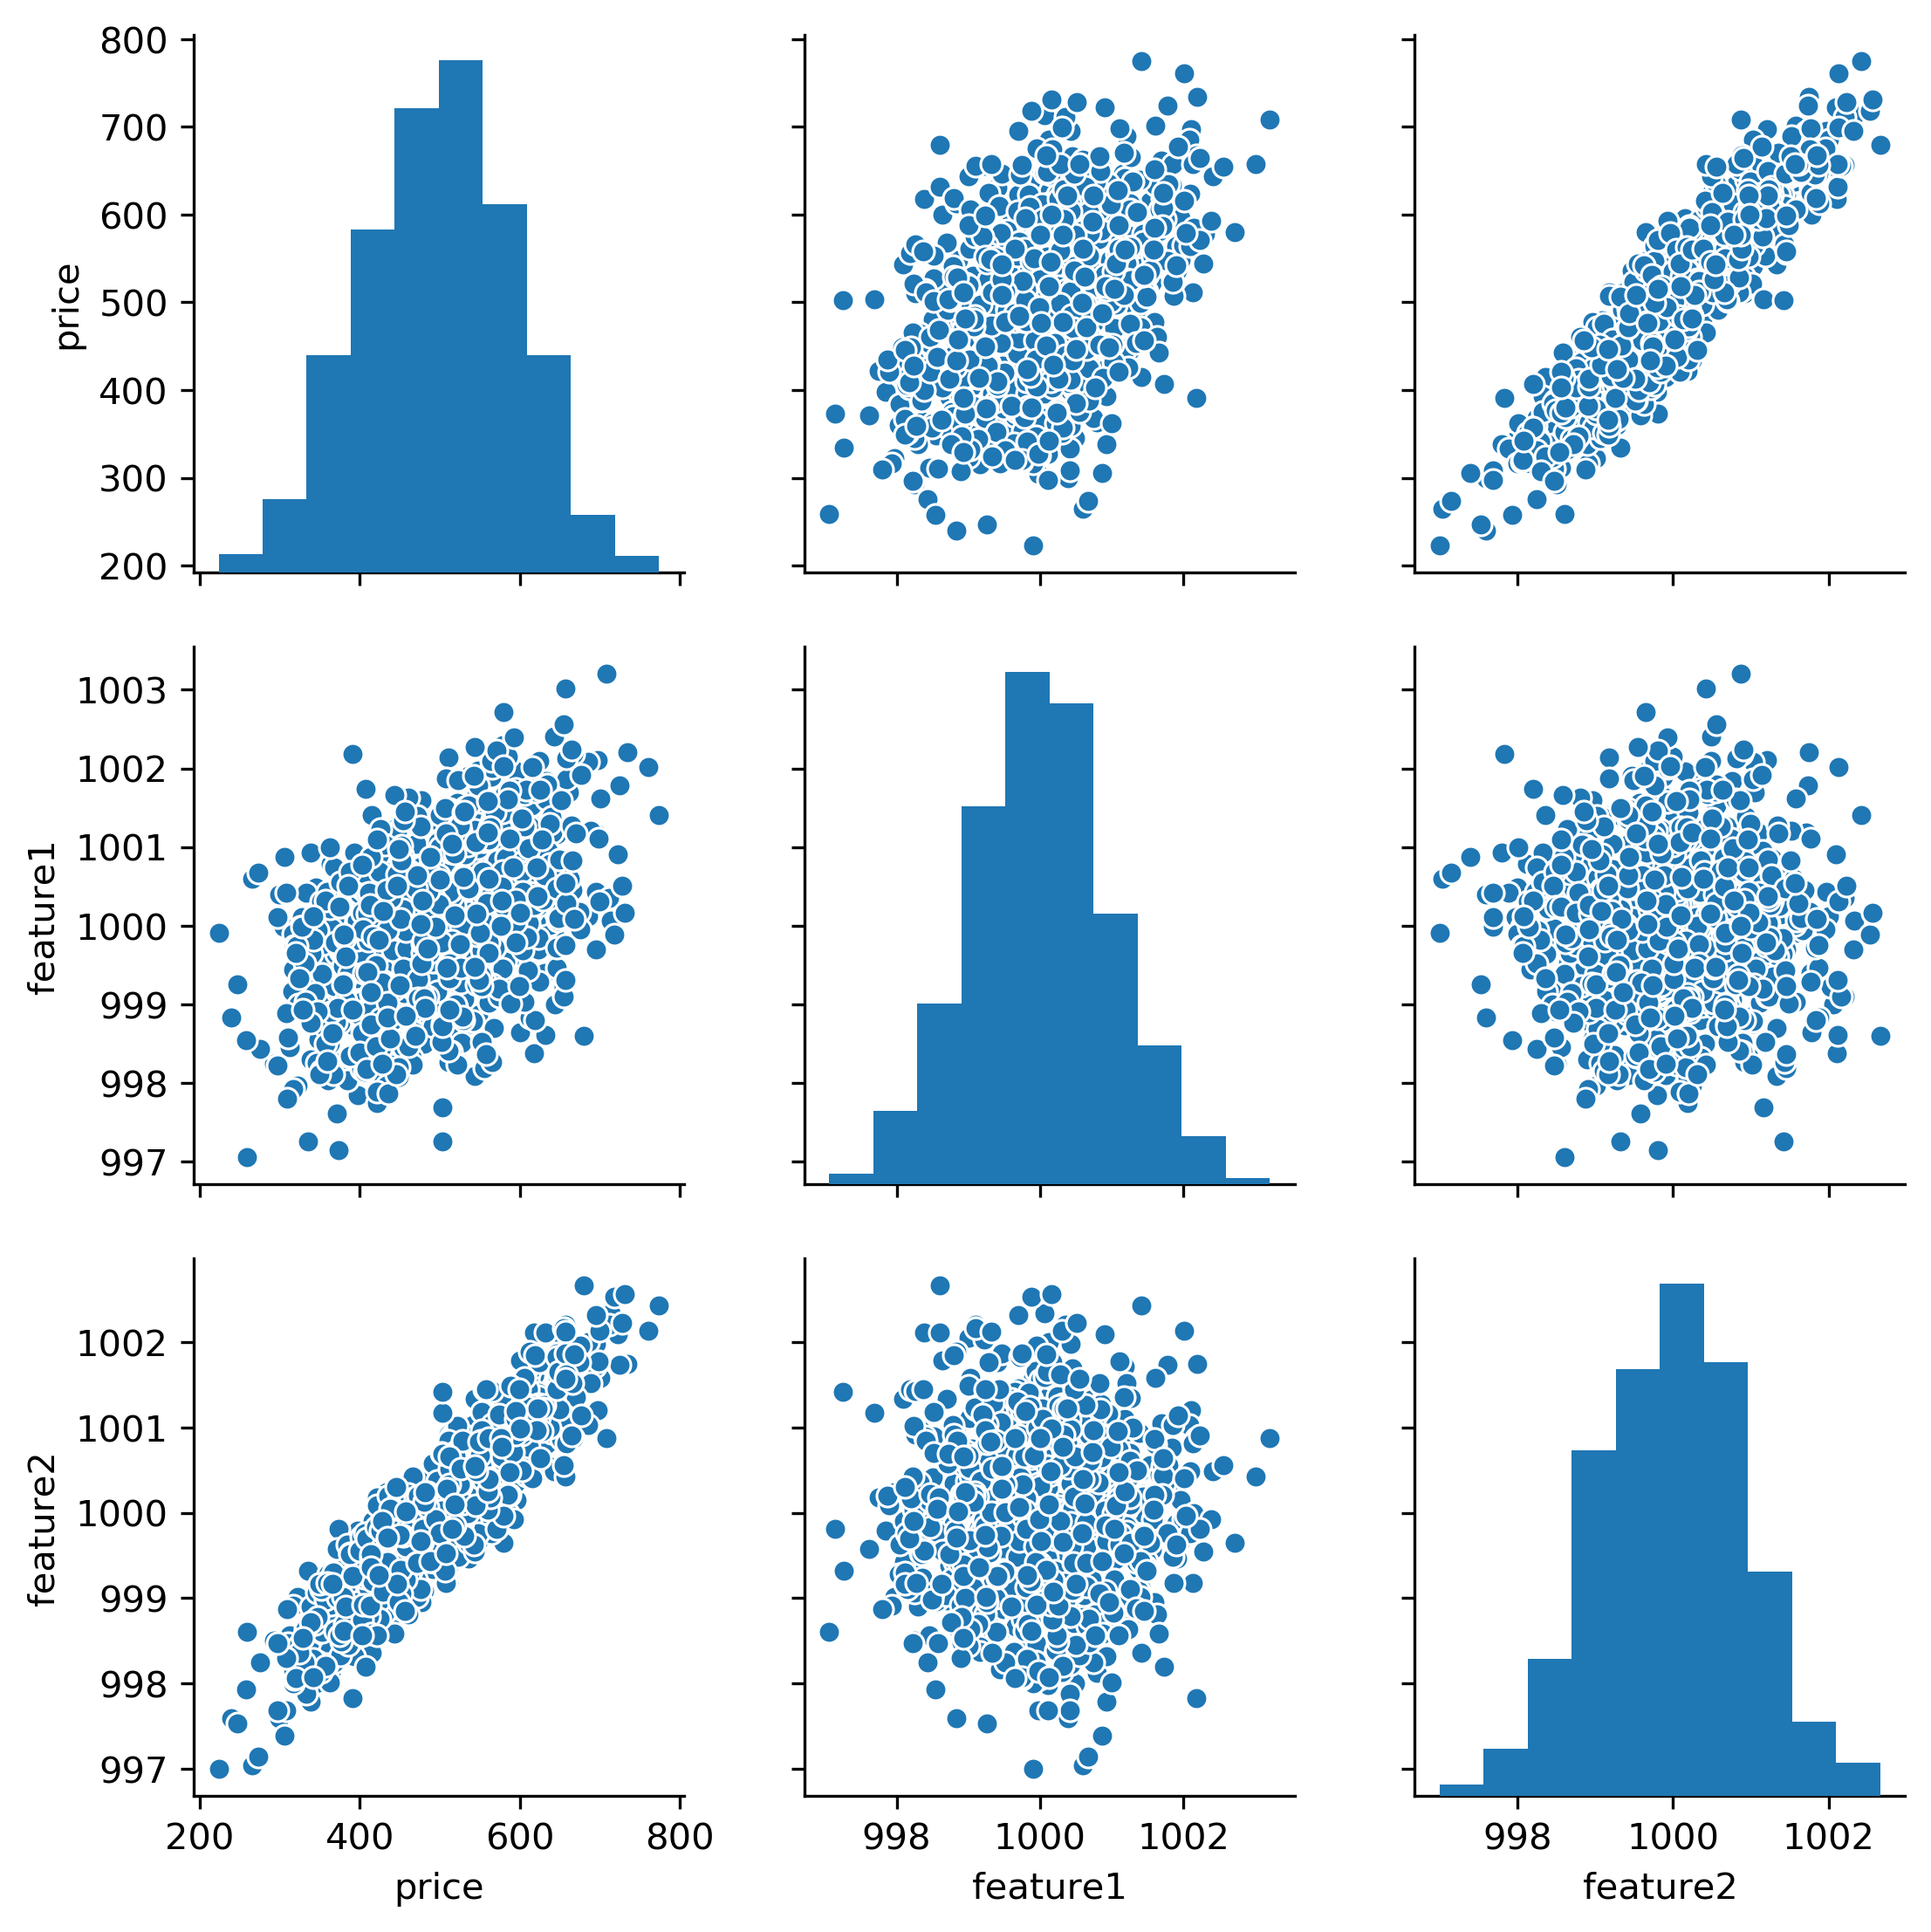

In [34]:
sns.pairplot(df);

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[["feature1", "feature2"]].values
y = df["price"].values

In [12]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [13]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.shape

(700, 2)

In [16]:
X_test.shape

(300, 2)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [22]:
X_test

array([[ 0.39533339,  0.38540671],
       [ 0.57300502,  0.74070924],
       [ 0.61294076,  0.65734264],
       [ 0.38169528,  0.73076311],
       [ 0.07776591,  0.46323644],
       [ 0.49421971,  0.68949258],
       [ 0.2065742 ,  0.70096247],
       [ 0.55141988,  0.41776773],
       [ 0.36812191,  0.69082394],
       [ 0.56465724,  0.3877465 ],
       [ 0.57048029,  0.71810824],
       [ 0.79569525,  0.47979901],
       [ 0.38488235,  0.41856516],
       [ 0.33142545,  0.42411972],
       [ 0.89361377,  0.63912775],
       [ 0.50191166,  0.39789174],
       [ 0.7159808 ,  0.43688384],
       [ 0.35812192,  0.92028225],
       [ 0.49989367,  0.85589311],
       [ 0.63965434,  0.59024789],
       [ 0.19053626,  0.34203634],
       [ 0.40982896,  0.45849208],
       [ 0.26844791,  0.40167269],
       [ 0.38649709,  0.33592759],
       [ 0.50654703,  0.65789843],
       [ 0.41260556,  0.79338075],
       [ 0.45631316,  0.61323307],
       [ 0.44064792,  0.40889315],
       [ 0.42963904,

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
# Method 1
model = Sequential([Dense(4, activation="relu"), 
                   Dense(2, activation="relu"),
                   Dense(1)])

In [28]:
# Method 2

model = Sequential()

model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
# The last layer is of 1 neuron with the final price output
model.add(Dense(1))

model.compile(optimizer="rmsprop",
              loss="mse")

To do it in separate lines allows us to remove layers easily.

In [29]:
model.fit(x=X_train, y=y_train,
         epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 1ms/sample - loss: 256423.0761
Epoch 2/250
700/700 [==============================] - 0s 27us/sample - loss: 256245.9014
Epoch 3/250
700/700 [==============================] - 0s 27us/sample - loss: 256075.4522
Epoch 4/250
700/700 [==============================] - 0s 29us/sample - loss: 255898.8500
Epoch 5/250
700/700 [==============================] - 0s 27us/sample - loss: 255706.2734
Epoch 6/250
700/700 [==============================] - 0s 29us/sample - loss: 255483.2771
Epoch 7/250
700/700 [==============================] - 0s 27us/sample - loss: 255225.4853
Epoch 8/250
700/700 [==============================] - 0s 30us/sample - loss: 254942.5124
Epoch 9/250
700/700 [==============================] - 0s 37us/sample - loss: 254633.1405
Epoch 10/250
700/700 [==============================] - 0s 39us/sample - loss: 254296.2385
Epoch 11/250
700/700 [==============================] - 0s 31us/sample - loss: 

700/700 [==============================] - 0s 30us/sample - loss: 2582.2890
Epoch 92/250
700/700 [==============================] - 0s 31us/sample - loss: 2546.8078
Epoch 93/250
700/700 [==============================] - 0s 27us/sample - loss: 2511.5052
Epoch 94/250
700/700 [==============================] - 0s 27us/sample - loss: 2476.8371
Epoch 95/250
700/700 [==============================] - 0s 27us/sample - loss: 2444.0853
Epoch 96/250
700/700 [==============================] - 0s 29us/sample - loss: 2408.8722
Epoch 97/250
700/700 [==============================] - 0s 26us/sample - loss: 2380.5545
Epoch 98/250
700/700 [==============================] - 0s 27us/sample - loss: 2348.9691
Epoch 99/250
700/700 [==============================] - 0s 26us/sample - loss: 2316.6746
Epoch 100/250
700/700 [==============================] - 0s 29us/sample - loss: 2283.0827
Epoch 101/250
700/700 [==============================] - 0s 29us/sample - loss: 2246.6059
Epoch 102/250
700/700 [=========

700/700 [==============================] - 0s 27us/sample - loss: 192.5124
Epoch 183/250
700/700 [==============================] - 0s 29us/sample - loss: 178.7944
Epoch 184/250
700/700 [==============================] - 0s 27us/sample - loss: 170.5149
Epoch 185/250
700/700 [==============================] - 0s 30us/sample - loss: 158.5295
Epoch 186/250
700/700 [==============================] - 0s 30us/sample - loss: 147.7619
Epoch 187/250
700/700 [==============================] - 0s 30us/sample - loss: 137.5931
Epoch 188/250
700/700 [==============================] - 0s 27us/sample - loss: 129.3616
Epoch 189/250
700/700 [==============================] - 0s 27us/sample - loss: 120.6755
Epoch 190/250
700/700 [==============================] - 0s 27us/sample - loss: 111.9111
Epoch 191/250
700/700 [==============================] - 0s 26us/sample - loss: 103.5462
Epoch 192/250
700/700 [==============================] - 0s 27us/sample - loss: 96.0113
Epoch 193/250
700/700 [=============

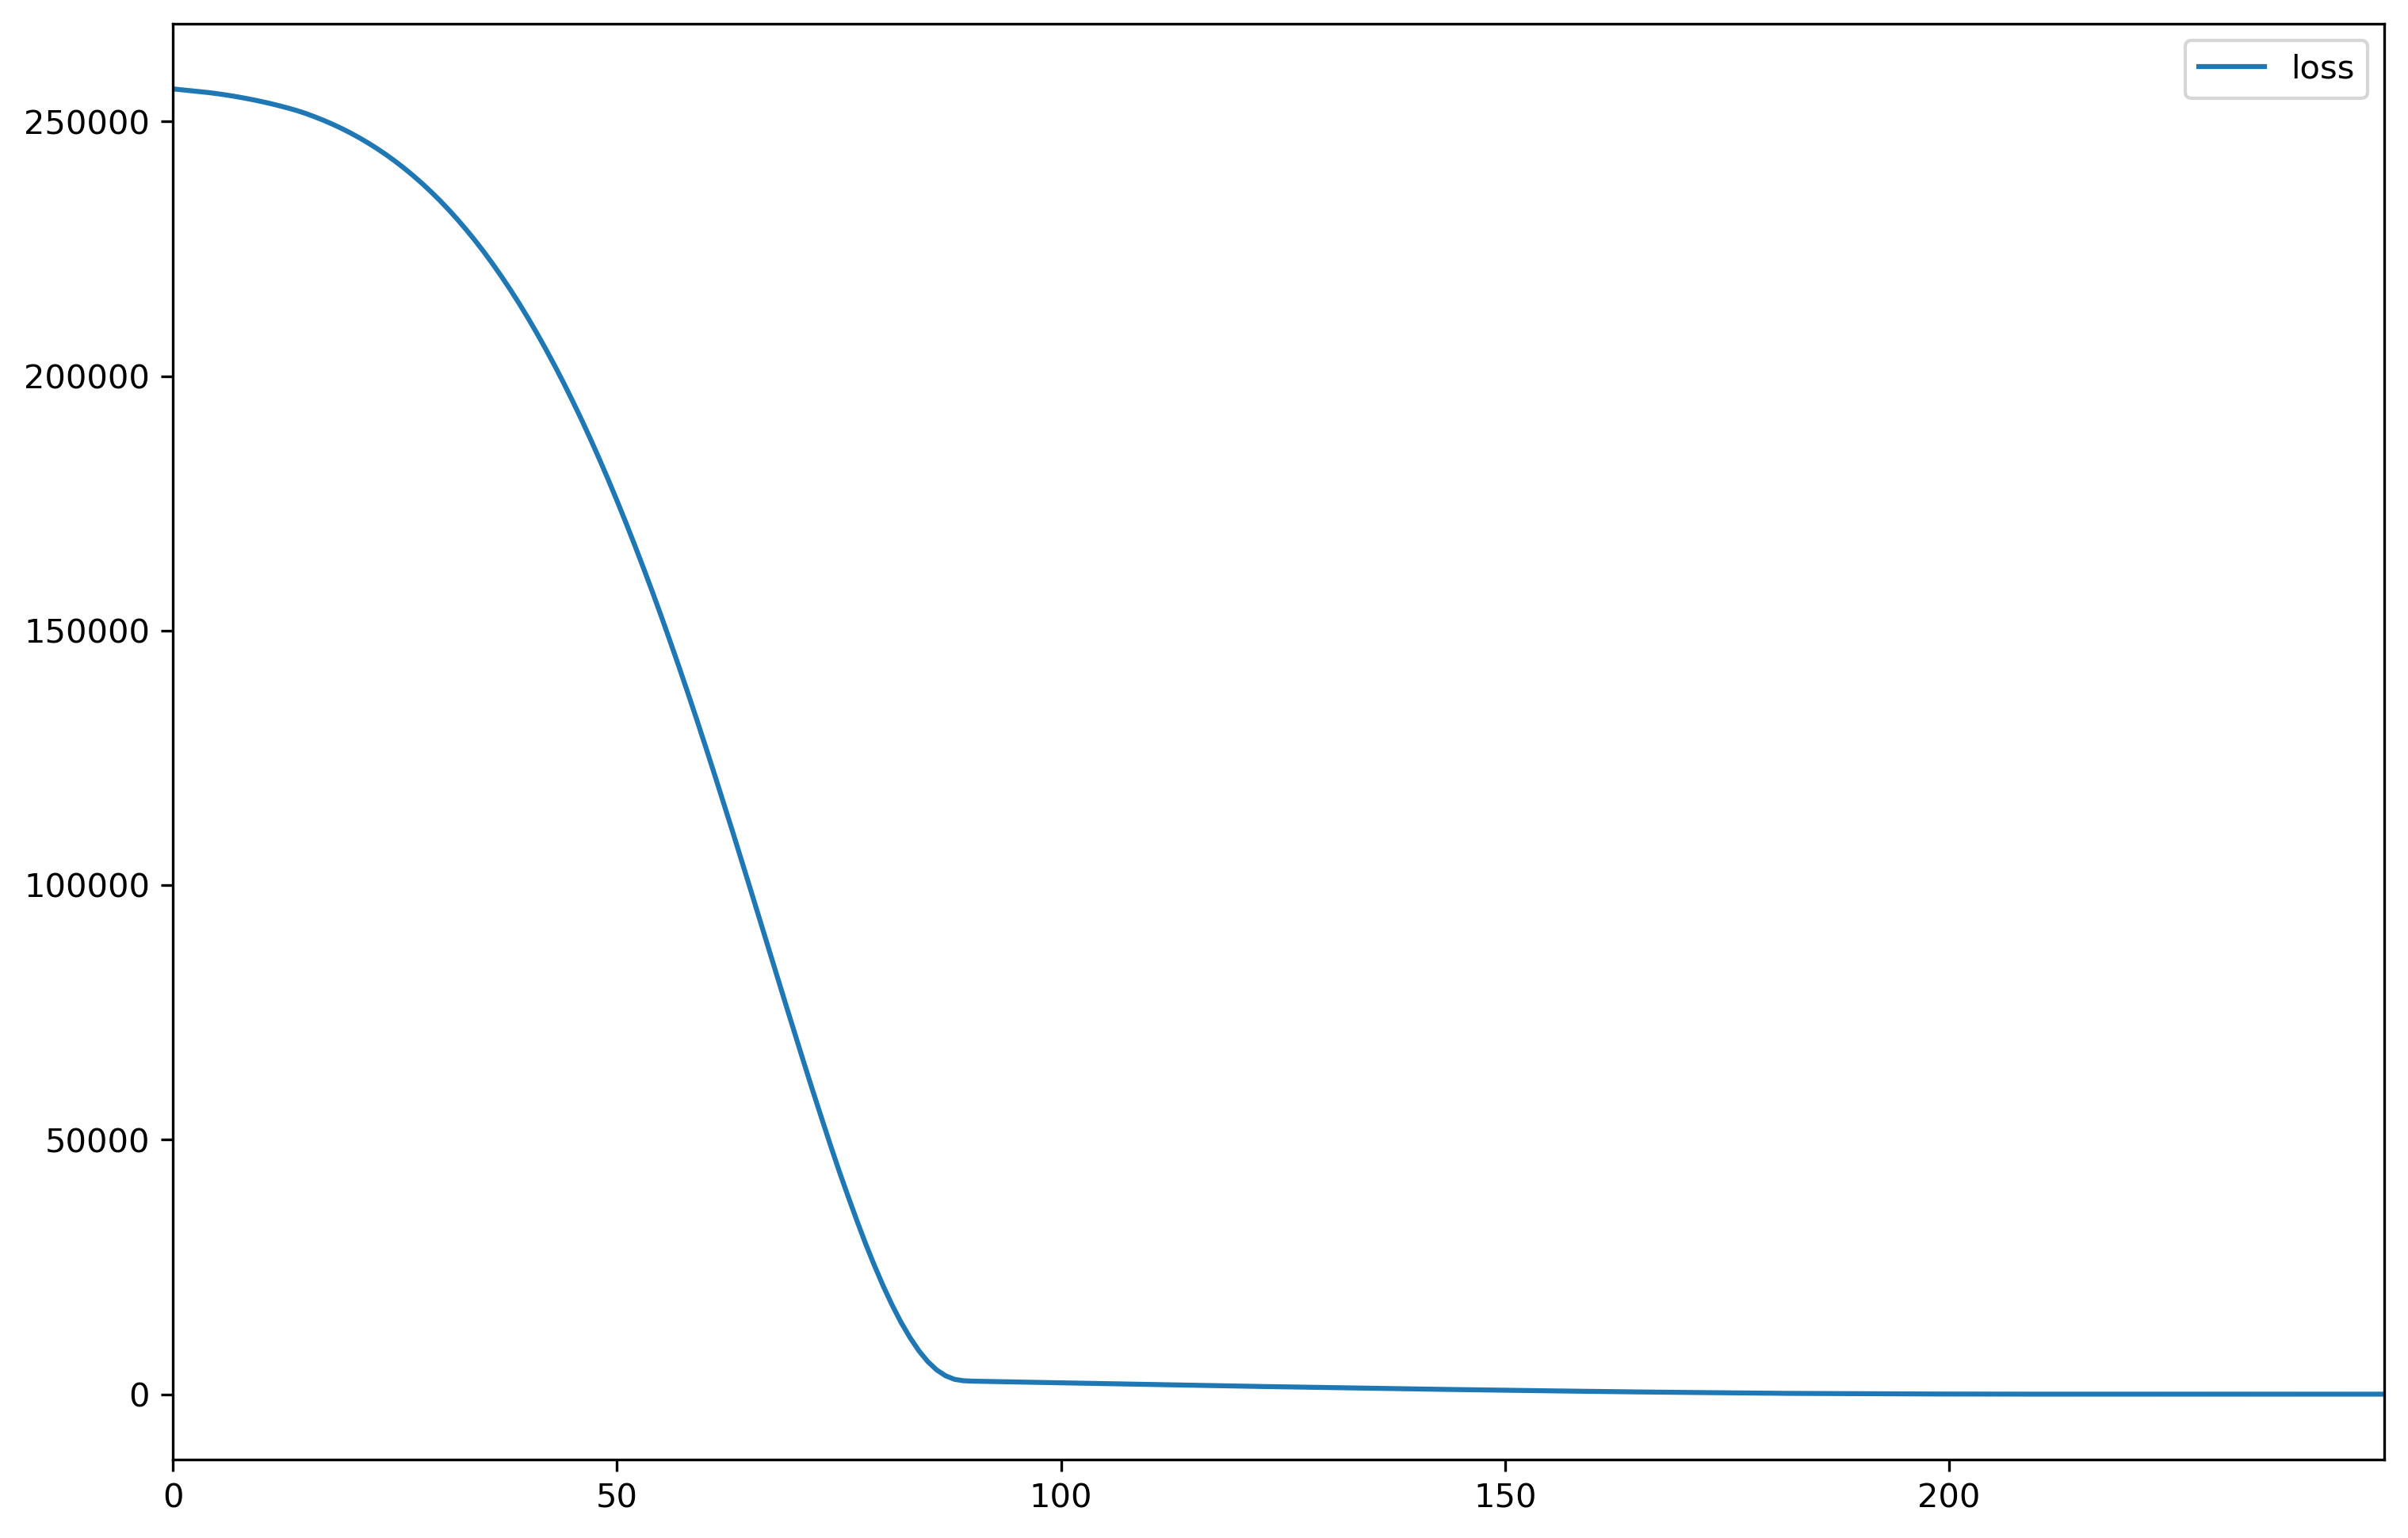

In [36]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [37]:
# Displays the metric loss that we established (MSE)
model.evaluate(x=X_test, y=y_test, 
              verbose=0)

24.931845703125

In [40]:
# Training loss
model.evaluate(x=X_train, y=y_train, 
              verbose=0)

23.943423712594168

In [41]:
test_predictions = model.predict(X_test)

In [42]:
test_predictions

array([[405.17636],
       [623.37756],
       [591.97235],
       [572.0855 ],
       [366.5309 ],
       [579.03   ],
       [514.93335],
       [458.9749 ],
       [549.1093 ],
       [447.38818],
       [611.626  ],
       [548.7815 ],
       [418.985  ],
       [408.76013],
       [651.0539 ],
       [437.17358],
       [508.30038],
       [659.77783],
       [662.4199 ],
       [565.3809 ],
       [334.14   ],
       [444.71298],
       [382.42554],
       [378.64685],
       [566.4474 ],
       [610.44324],
       [532.25214],
       [427.7403 ],
       [655.2866 ],
       [413.95895],
       [442.50742],
       [484.997  ],
       [438.29245],
       [681.68225],
       [424.628  ],
       [417.5784 ],
       [501.7725 ],
       [550.3284 ],
       [509.61185],
       [395.26434],
       [618.4264 ],
       [416.50723],
       [604.28845],
       [445.8244 ],
       [501.85492],
       [581.54285],
       [668.814  ],
       [490.26352],
       [318.47665],
       [485.29828],


In [43]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [44]:
test_predictions

0      405.176361
1      623.377563
2      591.972351
3      572.085510
4      366.530914
          ...    
295    528.912476
296    515.224609
297    609.490479
298    416.830109
299    410.768494
Length: 300, dtype: float32

In [53]:
pred_df = pd.DataFrame(y_test, columns=["Test True Y"])

In [54]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [55]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [57]:
pred_df.columns = ["Test True Y", "Model Predictions"]
pred_df

,Test True Y,Model Predictions
0,402.296319,405.176361
1,624.156198,623.377563
2,582.455066,591.972351
3,578.588606,572.085510
4,371.224104,366.530914
...,...,...
295,525.704657,528.912476
296,502.909473,515.224609
297,612.727910,609.490479
298,417.569725,416.830109


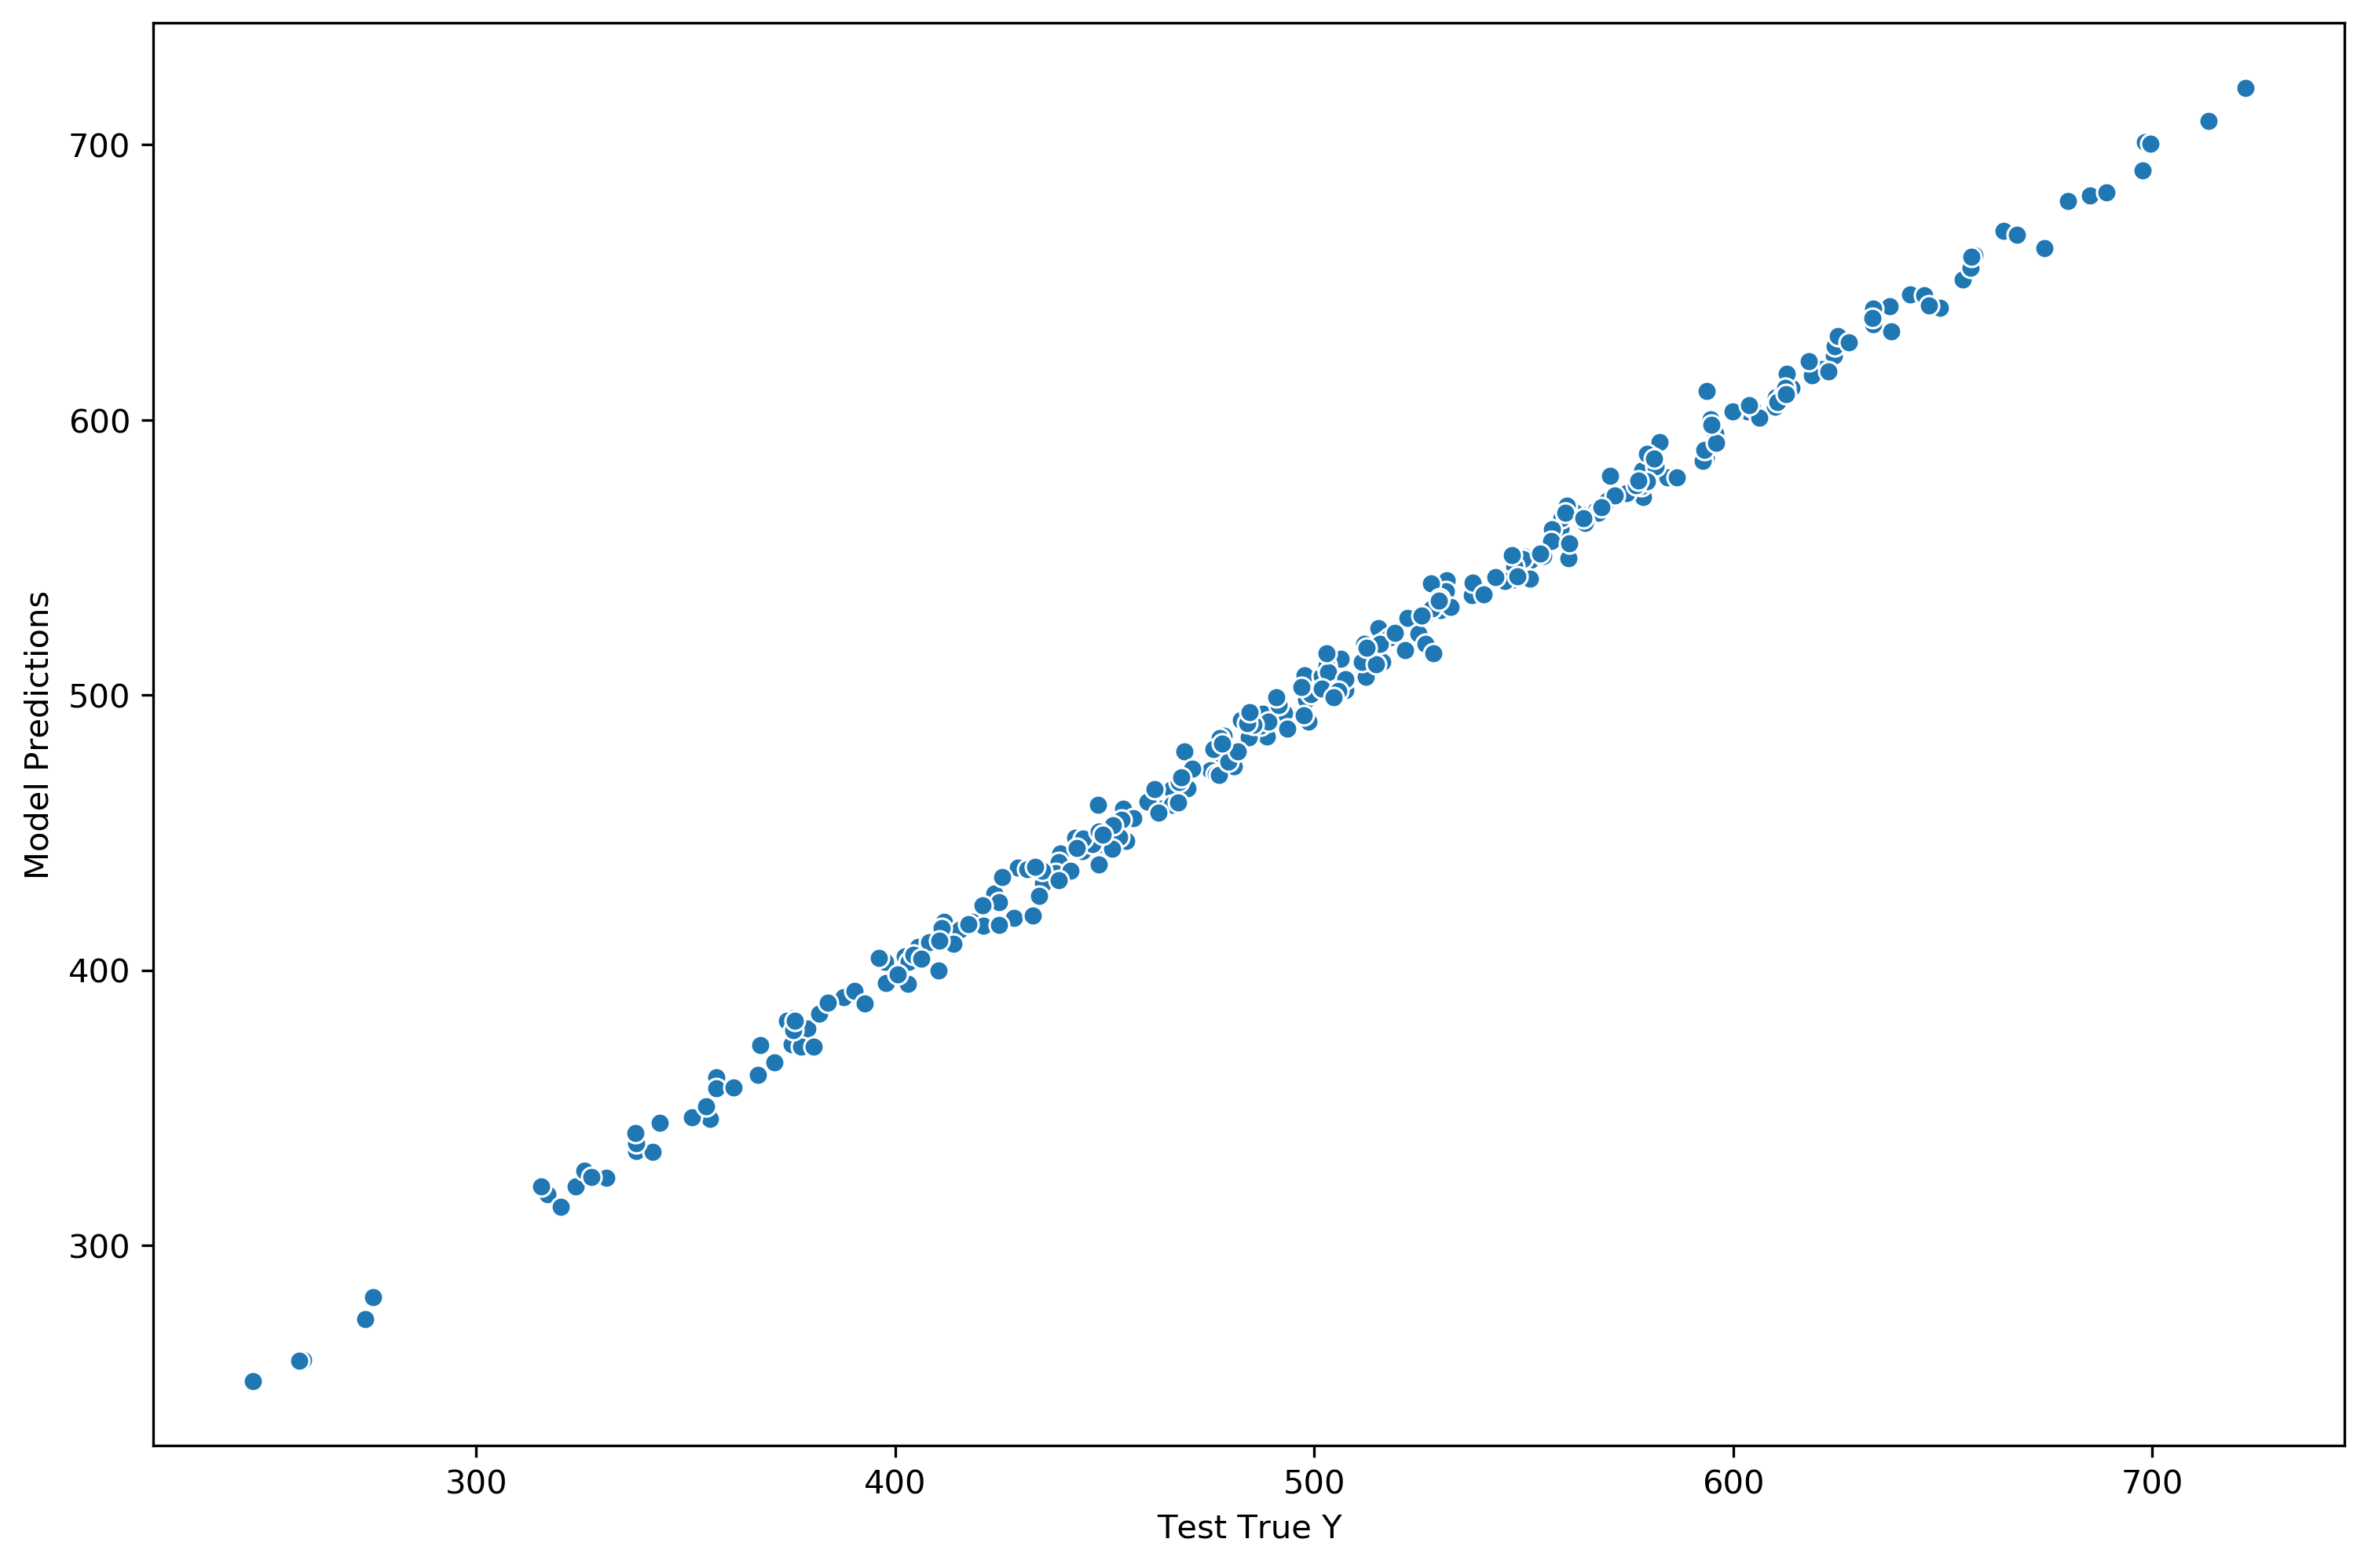

In [60]:
sns.scatterplot(data=pred_df, x="Test True Y", y="Model Predictions");

This model performs well as we almost have a straight line. The predicted values are very close to the true values.

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
mean_absolute_error(pred_df["Test True Y"], pred_df["Model Predictions"])

3.9991366470655945

In [63]:
mean_squared_error(pred_df["Test True Y"], pred_df["Model Predictions"])

24.931849670234545

In [64]:
mean_squared_error(pred_df["Test True Y"], pred_df["Model Predictions"])**0.5

4.993180316214762

With an average price of around 500 dollars, an MAE of around 4 is very good.

In [65]:
# New point
new_gem = [[998, 1000]]

In [66]:
# Predict the price
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

array([[419.5878]], dtype=float32)

In [67]:
# Save model
from tensorflow.keras.models import load_model
model.save("my_gem_model.h5")

In [ ]:
# Load model
#later_use = load_model("my_gem_model.h5")